In [23]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [24]:
# Read in the dataset
loans = pd.read_csv("loans.csv")

# Preview the data
loans.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [25]:
# Remove the loan_id to avoid accidentally using it as a feature
loans.drop(columns=["loan_id"], inplace=True)

In [26]:
# Counts and data types per column
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              553 non-null    object 
 1   married             553 non-null    object 
 2   dependents          553 non-null    object 
 3   education           553 non-null    object 
 4   self_employed       553 non-null    object 
 5   applicant_income    553 non-null    int64  
 6   coapplicant_income  553 non-null    float64
 7   loan_amount         553 non-null    float64
 8   loan_amount_term    553 non-null    float64
 9   credit_history      553 non-null    float64
 10  property_area       553 non-null    object 
 11  loan_status         553 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 52.0+ KB


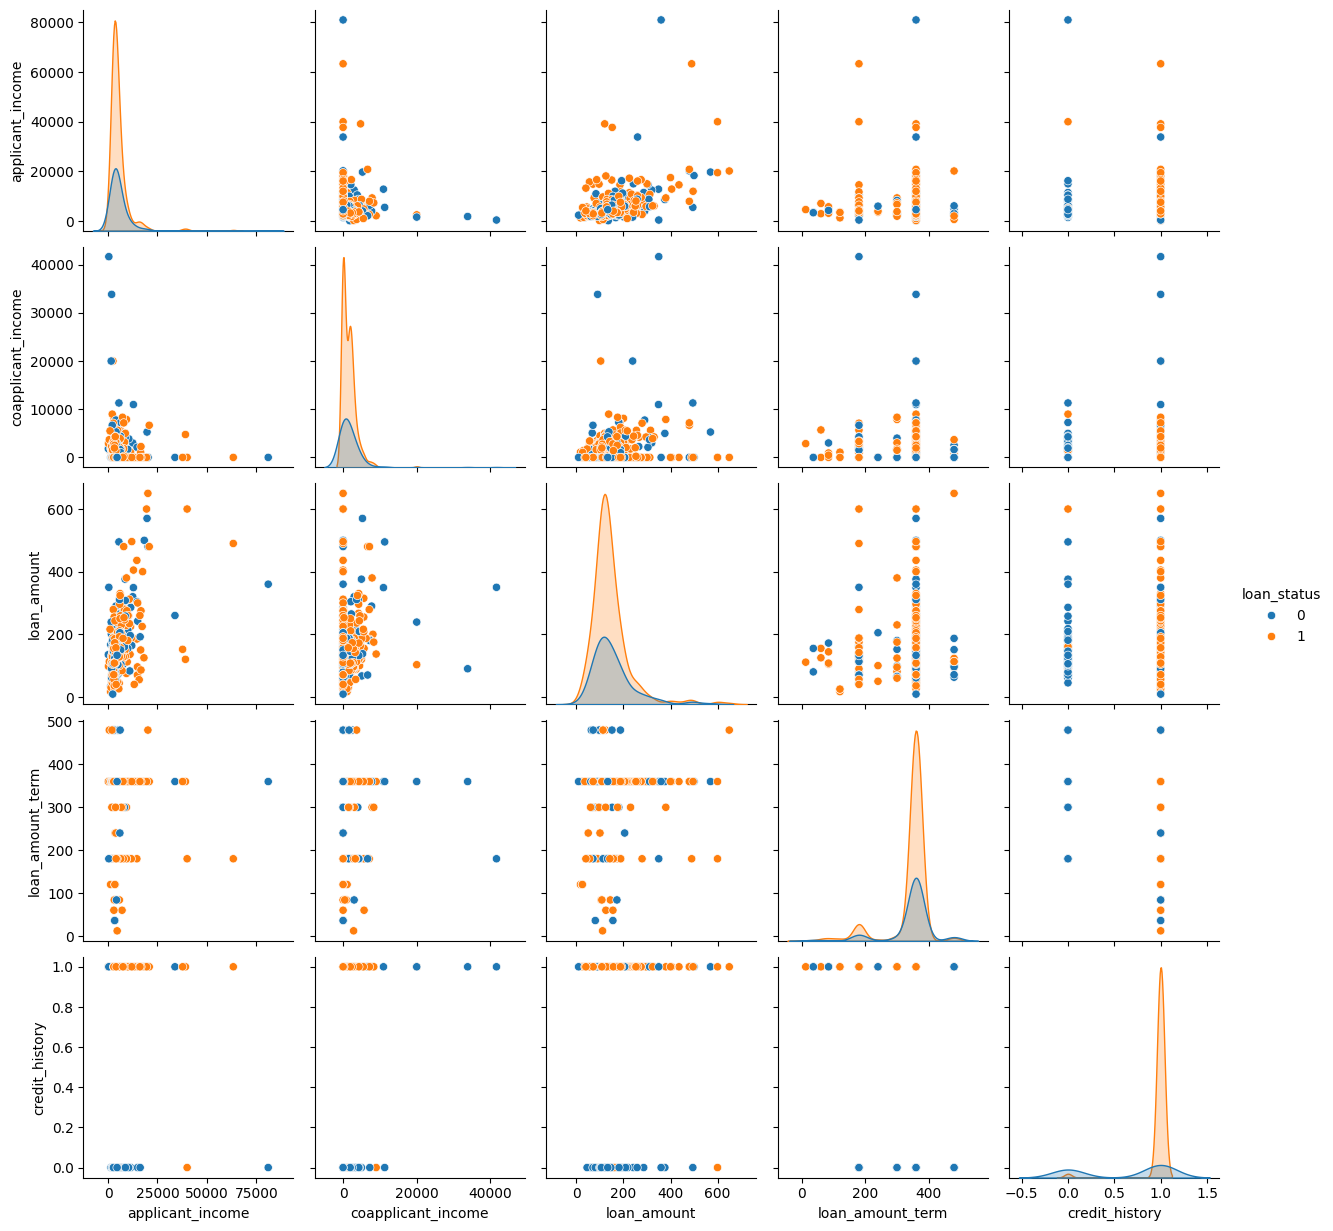

In [27]:
# Distributions and relationships
sns.pairplot(data=loans, diag_kind="kde", hue="loan_status")
plt.show()

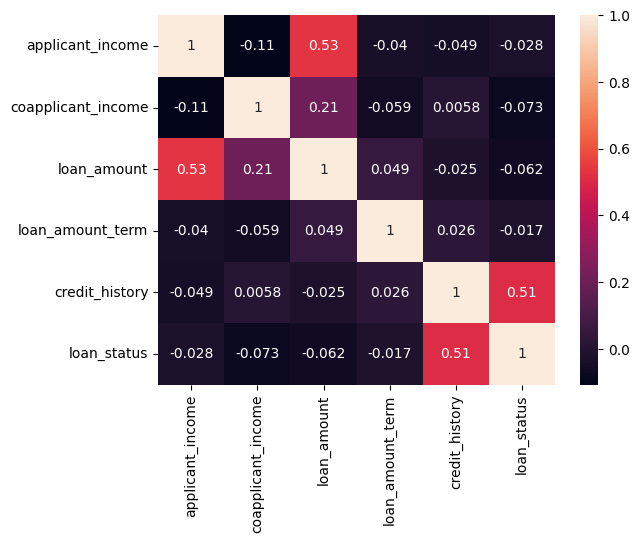

In [39]:
sns.heatmap(loans.corr(numeric_only=True),annot=True)
plt.show()

In [40]:
# Target frequency
loans['loan_status'].value_counts(normalize=True)

loan_status
1    0.703436
0    0.296564
Name: proportion, dtype: float64

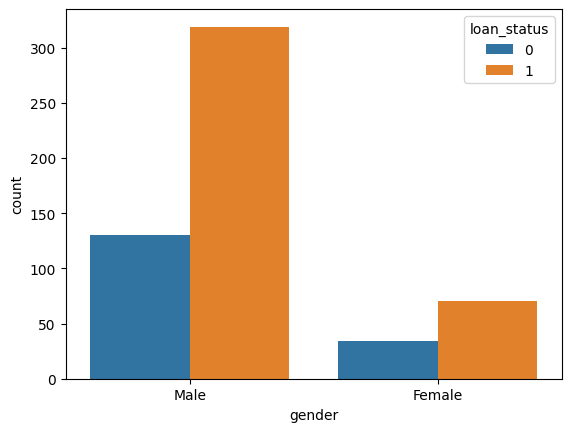

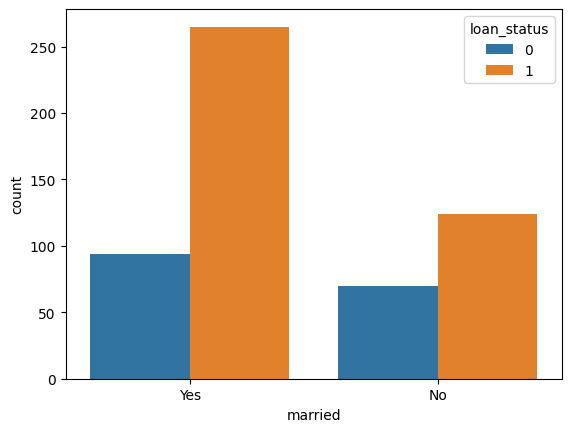

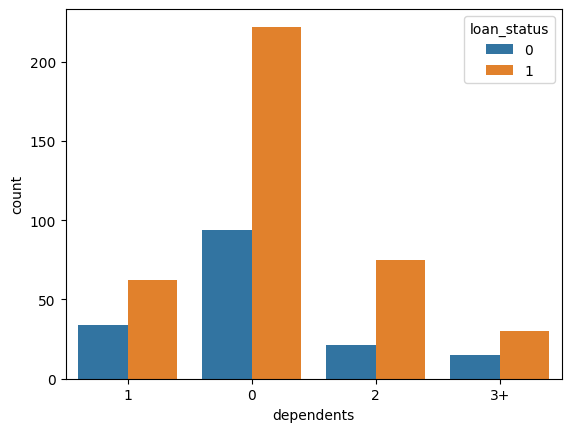

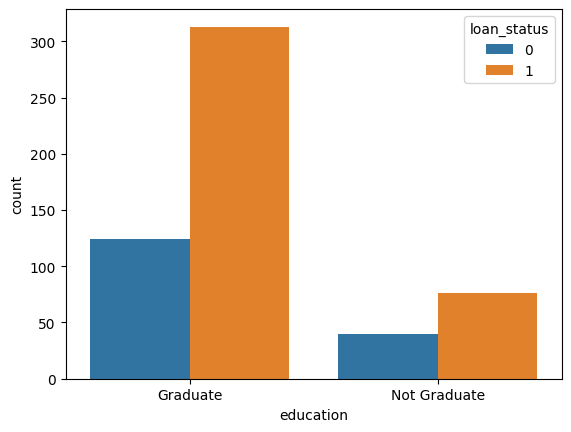

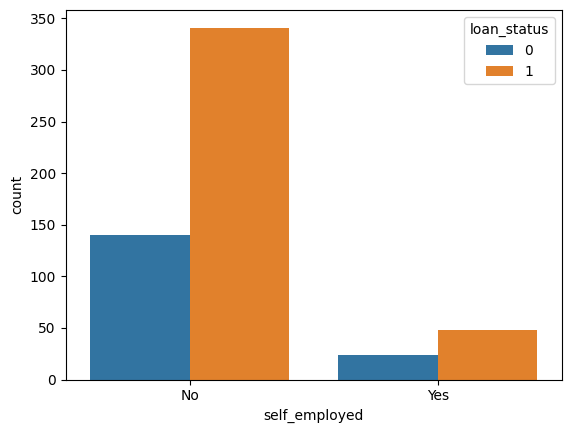

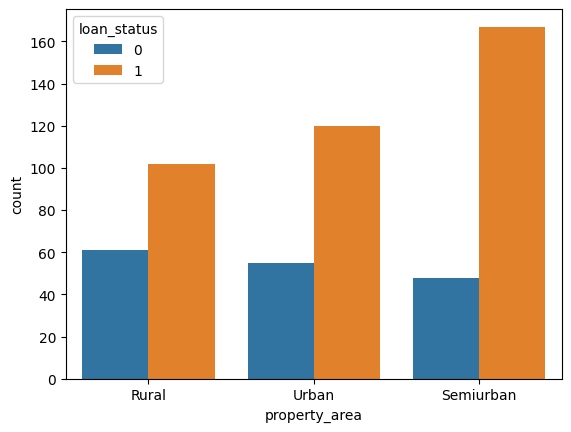

In [41]:
# Class frequency by loan_status
for col in loans.columns[loans.dtypes=='object']:
    sns.countplot(data=loans,x=col,hue='loan_status')
    plt.show()

In [47]:
# First model using loan_amount
X=loans[['loan_amount']]
y=loans[['loan_status']]
# Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
# Previewing the training set
print(X_train.head(),'\n',y_train.head())

     loan_amount
7          168.0
33         184.0
26         120.0
295         67.0
265        110.0 
      loan_status
7              1
33             1
26             1
295            1
265            1


In [52]:
# Instantiate a logistic regression model
logreg=LogisticRegression(random_state=42)
# Fit to the training data
logreg.fit(X_train,y_train)
# Predict test set values
y_pred=logreg.predict(X_test)
# Check the model's first five predictions
print(y_pred[:5])

[1 1 1 1 1]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
# Accuracy
print(logreg.score(X_test,y_test))

0.6987951807228916


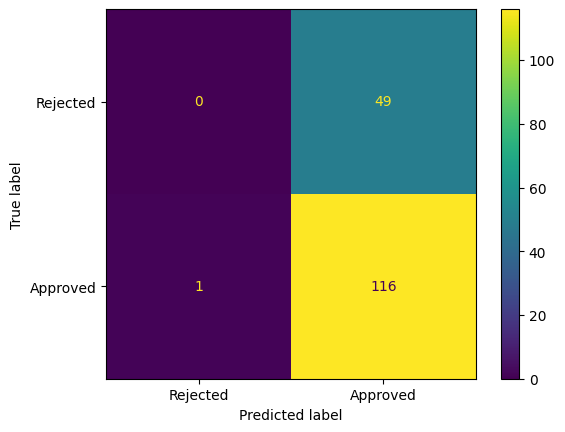

In [58]:
# Confusion matrix
conf_matrix=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=['Rejected','Approved'])
display.plot()
plt.show()

#Feature Engineering

In [59]:
# Convert categorical features to binary
loans=pd.get_dummies(loans)
# Previewing the new DataFrame
loans.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,4583,1508.0,128.0,360.0,1.0,0,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
1,3000,0.0,66.0,360.0,1.0,1,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
2,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
3,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
4,5417,4196.0,267.0,360.0,1.0,1,False,True,False,True,...,False,True,False,True,False,False,True,False,False,True


In [60]:
# Resplit into features and targets
X=loans.drop(columns=['loan_status'])
y=loans[['loan_status']]
# Split into training and test sets
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [61]:
# Instantiate logistic regression model
logreg=LogisticRegression(random_state=42)
# Fit to the training data
logreg.fit(X_train,y_train)
# Predict test set values
y_pred=logreg.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
# Accuracy
print(logreg.score(X_test,y_test))

0.7751937984496124


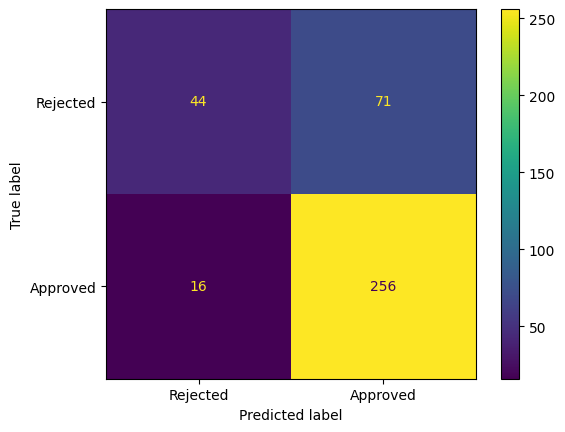

In [63]:
# Confusion matrix
conf_matrix=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=['Rejected','Approved'])
display.plot()
plt.show()

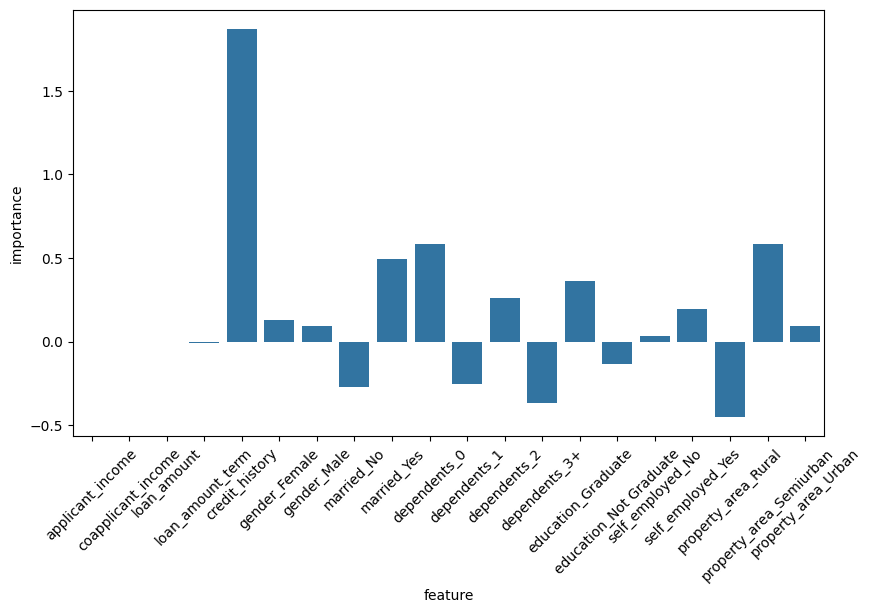

In [66]:
# Finding the importance of features
features_imp=pd.DataFrame({'feature':X_train.columns,'importance':logreg.coef_.reshape(-1)})
plt.figure(figsize=(9,5))
sns.barplot(data=features_imp,x='feature',y='importance')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()